# Gopalakrishnan Range Index

https://chartschool.stockcharts.com/table-of-contents/technical-indicators-and-overlays/technical-indicators/gopalakrishnan-range-index

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2019-01-01'
end = '2020-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.793777,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.029243,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.481922,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.402958,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.077835,164101200


In [3]:
n = 10
highest_high = df['High'].rolling(window=n).max()
lowest_low = df['Low'].rolling(window=n).min()
df['GAPO'] = np.log(highest_high - lowest_low) / np.log(n)


In [4]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,GAPO
Date,,,,,,,
2019-01-15,37.567501,38.347500,37.512501,38.267502,36.633064,114843600,0.624540
2019-01-16,38.270000,38.970001,38.250000,38.735001,37.080601,122278800,0.540330
2019-01-17,38.549999,39.415001,38.314999,38.965000,37.300785,119284800,0.539703
2019-01-18,39.375000,39.470001,38.994999,39.205002,37.530529,135004000,0.476397
2019-01-22,39.102501,39.182499,38.154999,38.325001,36.688110,121576000,0.369216


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,GAPO
Date,,,,,,,
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.054329,48478800,0.642712
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.424377,93121200,0.753200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.397659,146266000,0.760423
2019-12-30,72.364998,73.172501,71.305000,72.879997,70.815491,144114400,0.628133
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.332916,100805600,0.585743


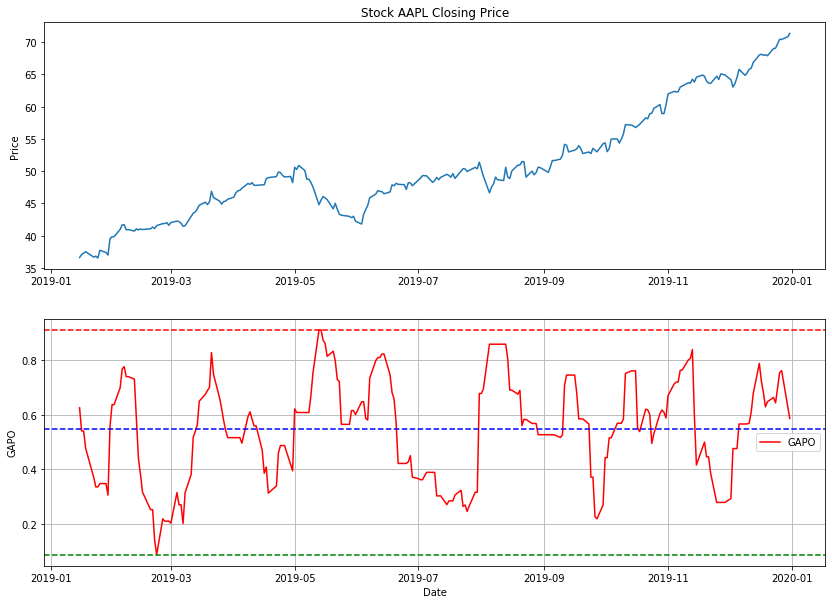

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['GAPO'], label='GAPO', color='red')
ax2.axhline(y=df['GAPO'].mean(), color='blue', linestyle='--')
ax2.axhline(y=df['GAPO'].min(), color='green', linestyle='--')
ax2.axhline(y=df['GAPO'].max(), color='red', linestyle='--')
ax2.grid()
ax2.set_ylabel('GAPO')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

<Figure size 432x288 with 0 Axes>

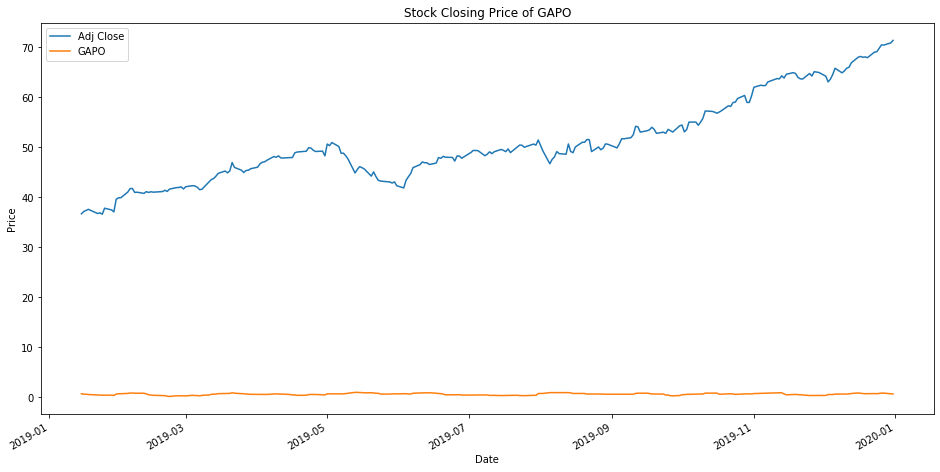

In [7]:
plt.figure()
df[['Adj Close', 'GAPO']].plot(figsize=(16,8))
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Stock Closing Price of GAPO')
plt.legend(loc='best') 

## Candlestick with GAPO

In [8]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,GAPO,VolumePositive
0,737074.0,37.567501,38.347500,37.512501,38.267502,36.633064,114843600,0.624540,False
1,737075.0,38.270000,38.970001,38.250000,38.735001,37.080601,122278800,0.540330,False
2,737076.0,38.549999,39.415001,38.314999,38.965000,37.300785,119284800,0.539703,False
3,737077.0,39.375000,39.470001,38.994999,39.205002,37.530529,135004000,0.476397,False
4,737081.0,39.102501,39.182499,38.154999,38.325001,36.688110,121576000,0.369216,False


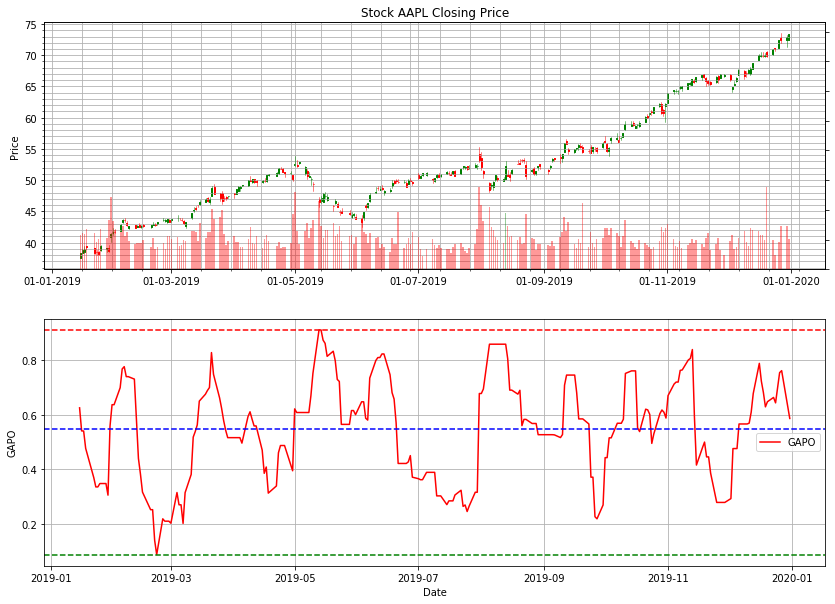

In [9]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['GAPO'], label='GAPO', color='red')
ax2.axhline(y=df['GAPO'].mean(), color='blue', linestyle='--')
ax2.axhline(y=df['GAPO'].min(), color='green', linestyle='--')
ax2.axhline(y=df['GAPO'].max(), color='red', linestyle='--')
ax2.grid()
ax2.set_ylabel('GAPO')
ax2.set_xlabel('Date')
ax2.legend(loc='best')